# Group 41 Project Report

## Maternal Health Data and Health Risk Level

#### Research Question: To what extent can we use model data from “sensing enabled technology”: blood pressure, blood glucose level, body temperature and heart rate, to classify and predict Bangladeshi women’s maternal health risk level?

### Background Information 

Maternal mortality is a pervasive problem especially in developing nations, and affecting the disadvantaged classes disproportionately. It is especially unfortunate that many of these maternal fatalities are preventable. Ahmed et al. (2020) devise a method to track real-time data of pregnant women in remote/rural areas in Bangladesh through the usage of wearable sensing devices. This data can be used to classify risk factors and provide timely intervention when needed to women who might be susceptible to complications, and consequently face increased risk of maternal death. We will be using the dataset from Ahmed et al.(2020)(accessed via the UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/863/maternal+health+risk).  
**Our data has the following variables (columns):**
- Age 
- Systolic Blood Pressure (SystolicBP)
- Diastolic Blood Pressure (DiastolicBP)
- Blood Glucose Level (BS)
- Body Temperature (BodyTemp)
- Resting Heart Rate (HeartRate)
- Predicted Risk Intensity Level during pregnancy (RiskLevel)

A WHO systematic review of global causes of maternal health (Say et al., 2014) identifies hypertension as one of the direct causes of maternal health risk, accounting for 14% of maternal deaths. Additionally, this review finds that some indirect causes of maternal death are diabetes and older age. Thus, all the given health variables except Body Temperature shall be included in the classifier as they relate to causes of maternal health respectively. This is especially considering the fact that increased body temperature, called hyperthermia, is associated with fetal mortality and birth defects but not maternal mortality (Edwards, 2006). Since the focus of our research is maternal mortality, body temperature is not a associated health predictor and will not be included in our classifier. 

## Import Libraries

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("kknn")
library("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

We have to import several libraries in order to build our model. Tidyverse and Tidymodels will be used to build the classification model later. We will also use the kknn model to perform k-nn classification strategy on the data.

## Read data from URL

In [4]:
mat_health_data <- read_csv("https://raw.githubusercontent.com/aaronardenma/dsci-100-2023w1-group-41/main/Maternal_Health_Risk_Data_Set.csv")

Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data exploration

In [5]:
## Display the data set
mat_health_data

Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,130,80,15,98,86,high risk
35,140,90,13,98,70,high risk
29,90,70,8,100,80,high risk
⋮,⋮,⋮,⋮,⋮,⋮,⋮
35,85,60,19,98,86,high risk
43,120,90,18,98,70,high risk
32,120,65,6,101,76,mid risk


In [6]:
## Display statistical information
summary(mat_health_data)

      Age          SystolicBP     DiastolicBP           BS        
 Min.   :10.00   Min.   : 70.0   Min.   : 49.00   Min.   : 6.000  
 1st Qu.:19.00   1st Qu.:100.0   1st Qu.: 65.00   1st Qu.: 6.900  
 Median :26.00   Median :120.0   Median : 80.00   Median : 7.500  
 Mean   :29.87   Mean   :113.2   Mean   : 76.46   Mean   : 8.726  
 3rd Qu.:39.00   3rd Qu.:120.0   3rd Qu.: 90.00   3rd Qu.: 8.000  
 Max.   :70.00   Max.   :160.0   Max.   :100.00   Max.   :19.000  
    BodyTemp        HeartRate     RiskLevel        
 Min.   : 98.00   Min.   : 7.0   Length:1014       
 1st Qu.: 98.00   1st Qu.:70.0   Class :character  
 Median : 98.00   Median :76.0   Mode  :character  
 Mean   : 98.67   Mean   :74.3                     
 3rd Qu.: 98.00   3rd Qu.:80.0                     
 Max.   :103.00   Max.   :90.0                     

From the above, we can see multiple features, including age, systolic blood pressure, diastolic blood pressure, blood glucose level, body temperature and resting heart rate. 

Given our research focus on hypertension, age, and diabetes as focal predictors of maternal health risk (see Say et al., 2014), we will use all health predictors except Body Temperature. 

In [7]:
#Removing BodyTemp column
mat_health_risk <- select(mat_health_data, -c(BodyTemp))
mat_health_risk

Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,130,80,15,86,high risk
35,140,90,13,70,high risk
29,90,70,8,80,high risk
⋮,⋮,⋮,⋮,⋮,⋮
35,85,60,19,86,high risk
43,120,90,18,70,high risk
32,120,65,6,76,mid risk


## Class distribution

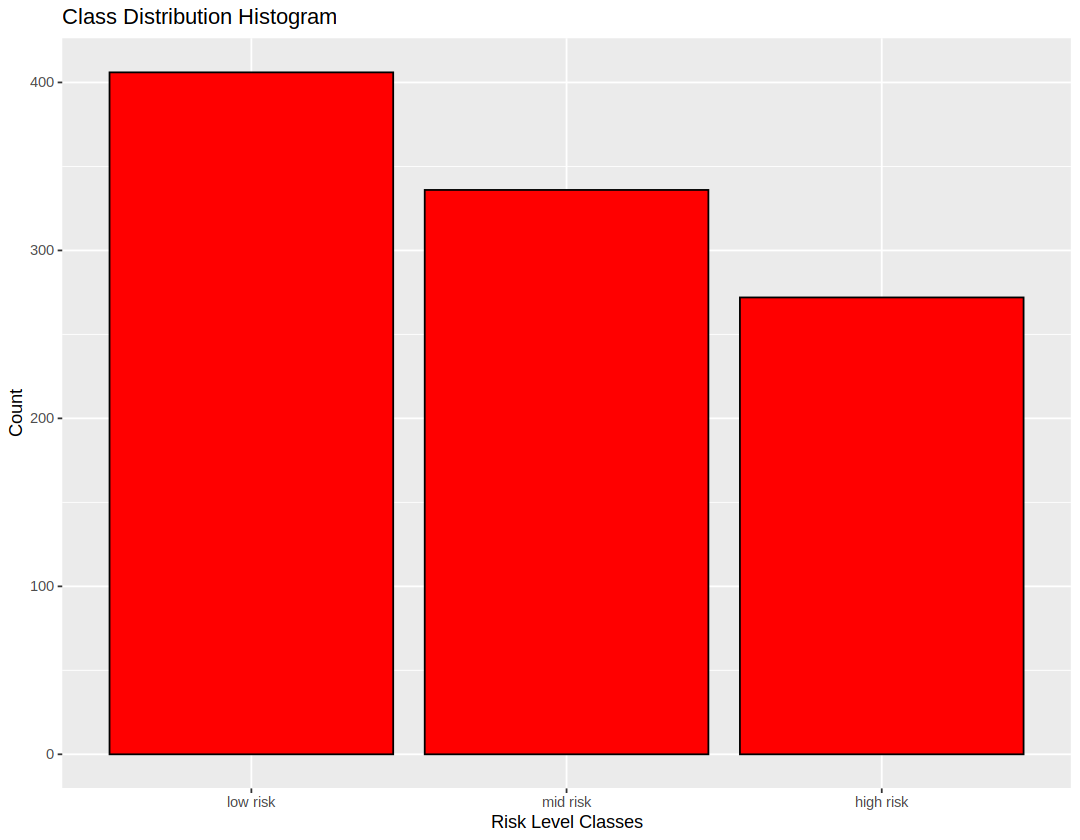

In [8]:
options(repr.plot.width = 9, repr.plot.height = 7)
class_distribution_plot <- mat_health_risk |>
    select(RiskLevel) |>
    mutate(RiskLevel = factor(RiskLevel)) |>
    mutate(RiskLevel = RiskLevel |> fct_relevel("low risk", "mid risk", "high risk")) |>
    group_by(RiskLevel) |>
    summarize(count = n()) |>
    ggplot(aes(x = RiskLevel, y = count)) +
    geom_bar(stat="identity", color = "black", fill = "red") +
    xlab("Risk Level Classes") +
    ylab("Count") +
    ggtitle("Class Distribution Histogram")

class_distribution_plot

### Observation
From the above bar plot, we can discover the problem of class imbalance. The dataset is slightly skewed to the right, meaning we can observe more low risk cases than mid risk cases, and more mid risk cases than high risk cases. The imbalance situation is still acceptable, yet, we have to keep that in mind when performing evaluation metric. That is because with a higher distribution of the negative class (i.e. low risk in our study) can lead to a higher chance of false negative if the model was not properly trained. ***Therefore, we will have to keep track on the false negative percentage while evaluating the model.***

## Train Test Split

In [9]:
set.seed(1) 

mat_health_risk <- mat_health_risk |>
    mutate(RiskLevel = as_factor(RiskLevel))

mat_health_risk_split <- initial_split(mat_health_risk, prop = 0.75, strata = RiskLevel)  
health_train <- training(mat_health_risk_split)   
health_test <- testing(mat_health_risk_split)


We have set the train-test proportion to be 75% and RiskLevel as our strata.

## Workflow Setup

In [10]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

health_recipe <- recipe(RiskLevel ~ ., data = health_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

health_vfold <- vfold_cv(health_train, v = 5, strata = RiskLevel)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

health_fit <- workflow() |>
    add_recipe(health_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = health_vfold, grid = k_vals)

knn_results <- health_fit |>
          collect_metrics()

The code above is the setup of our workflow. 

First, we chose to use k-nn classifier for the job. For the k-value (number of neighbors), we passed in the tune() object so that we can find the best value later. 

Second, we created a recipe for the data. We kept all the features as predictors, then we normalized the predictors by scaling them and centering them, so that the weighting of our k-nn model will not lean to one side.

Third, we created the workflow and added our freshly created model object and recipe into the workflow. Then, we passed in the training data into the workflow and fit the model with training data. 

Third, we split the training set into 5 folds, so that we can perform 5-fold cross validation process and get a better result.

Fourth, we created an object called 'knn_result'. This object is the workflow of the training model. We added the newly created recipe and model into the workflow and passed in the tune_grid object. The tune_grid object will perform 25 fits with 25 different hyperparameter settings (i.e. different k-values, ranging from 1 to 50 by stepping of 2) using the 5 fold dataset. 

Finally, we collected the metrics information into a new object called knn_results.

In [11]:
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7656467,5,0.01695871,Preprocessor1_Model01
1,roc_auc,hand_till,0.8301144,5,0.01264474,Preprocessor1_Model01
3,accuracy,multiclass,0.6604389,5,0.01272539,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,roc_auc,hand_till,0.8088858,5,0.006330132,Preprocessor1_Model24
49,accuracy,multiclass,0.5909942,5,0.018965488,Preprocessor1_Model25
49,roc_auc,hand_till,0.8066838,5,0.006205150,Preprocessor1_Model25


## Accuracy Metric

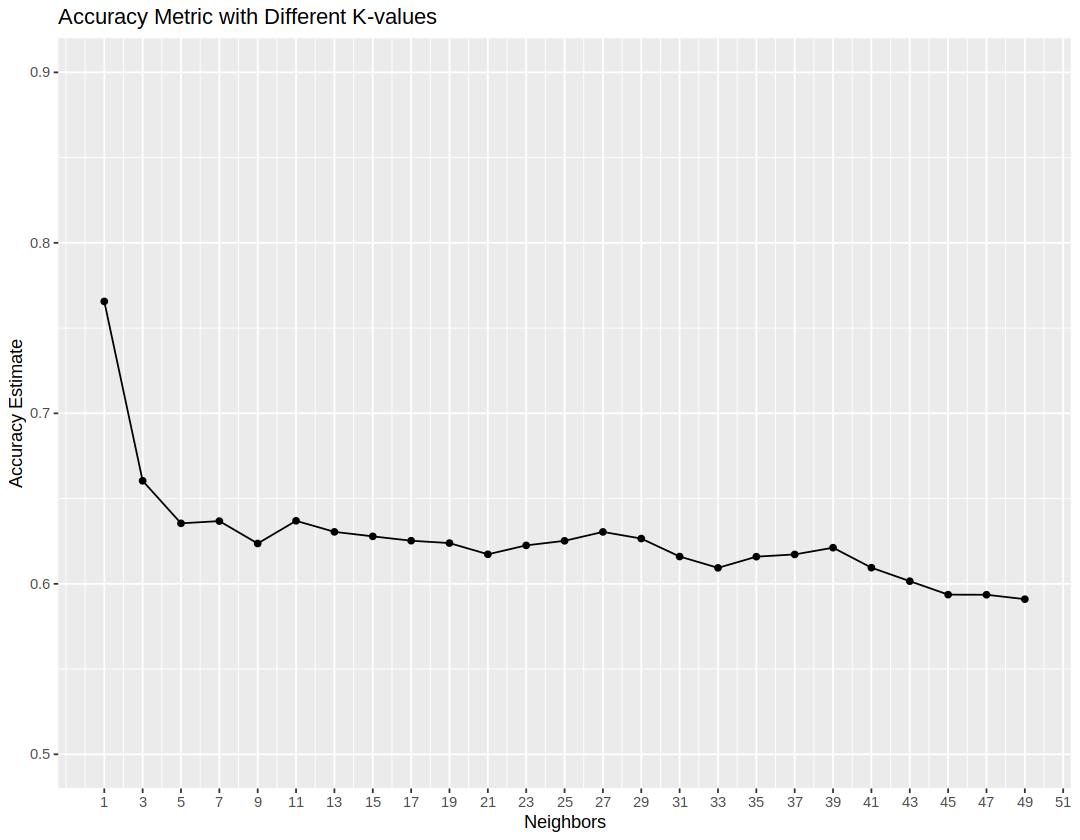

In [12]:
accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy Metric with Different K-values") +
      scale_x_continuous(breaks = seq(1, 51, by = 2)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.5, 0.9)) # adjusting the y-axis


accuracy_versus_k

### Observation
From the graph above, we can see that the K-value of 1 is the most accurate hyperparameter setting. However, to further proof 1 is the best value, we will explore more on the range of 1 to 3.

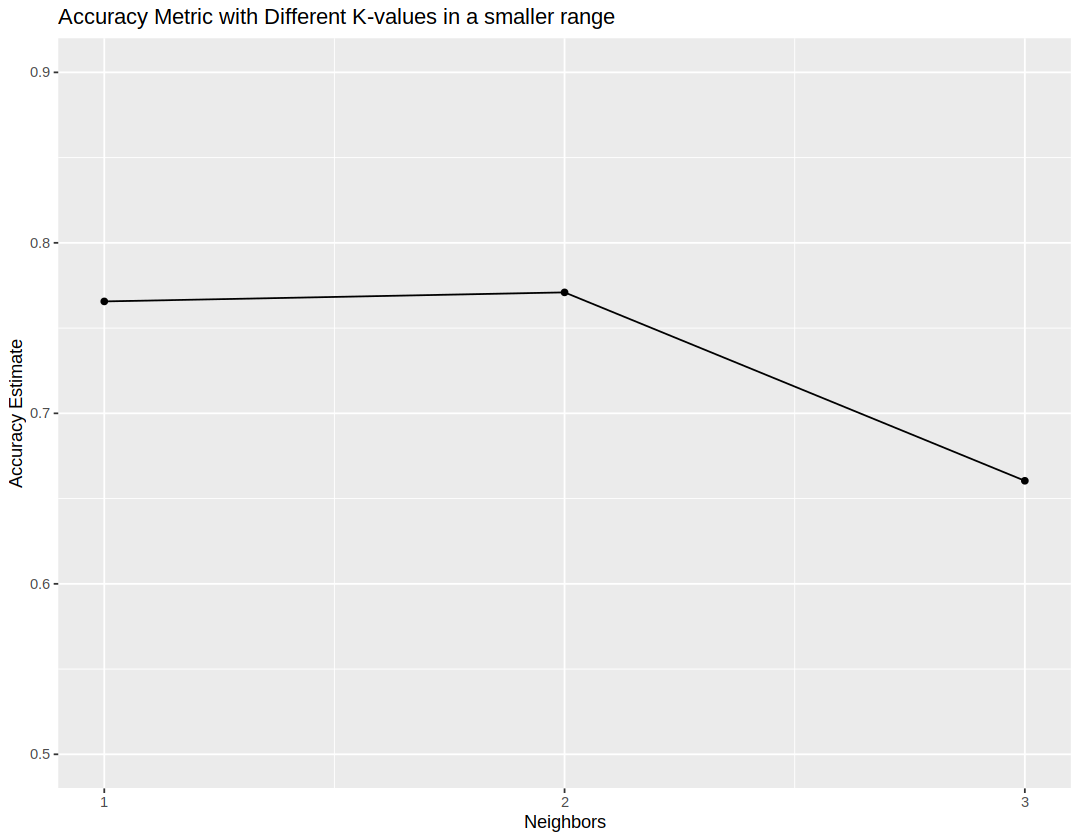

In [13]:
# A smaller range for the k values tibble
k_vals_small <- tibble(neighbors = seq(from = 1, to = 3))

health_fit_small_range <- workflow() |>
    add_recipe(health_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = health_vfold, grid = k_vals_small, control = control_grid(save_workflow = TRUE))

knn_results_small_range <- health_fit_small_range |>
          collect_metrics()

# Obtain the accuracies for K = 1-3
accuracies_small_range <- knn_results_small_range |> 
      filter(.metric == "accuracy")

accuracy_versus_k_small_range <- ggplot(accuracies_small_range, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy Metric with Different K-values in a smaller range") +
      scale_x_continuous(breaks = seq(1, 3)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.5, 0.9)) # adjusting the y-axis


accuracy_versus_k_small_range

## Observation and Conclusion

The value of 1 and 2 are having similar accuracy, so picking both values would be reasonable. However, picking the value of 1 can be problematic, since it means predicting the new observation with the closest neighbor in the training dataset. ***Therefore, we will pick k = 2 for our model to lower the risk of overfitting.***

## Build a model with k = 2

In [14]:
# Model with k = 2
knn_spec_k2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
        set_engine("kknn") |>
        set_mode("classification") 

health_fit_k2 <- workflow() |>
    add_recipe(health_recipe) |>
    add_model(knn_spec_k2) |>
    fit(health_train)

health_pred_k2 <- predict(health_fit_k2, health_test) |>
    bind_cols(health_test) |>
    mutate(.pred_class = as_factor(.pred_class)) |>
    mutate(RiskLevel = as_factor(RiskLevel)) |>
    mutate(RiskLevel = RiskLevel |> fct_relevel("low risk", "mid risk", "high risk")) |>
    mutate(.pred_class = .pred_class |> fct_relevel("low risk", "mid risk", "high risk"))

health_pred_k2

.pred_class,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
high risk,29,90,70,8,80,high risk
high risk,30,140,85,7,70,high risk
high risk,35,85,60,11,86,high risk
⋮,⋮,⋮,⋮,⋮,⋮,⋮
mid risk,55,140,80,7.2,76,high risk
high risk,25,120,90,12.0,80,high risk
high risk,43,120,90,18.0,70,high risk


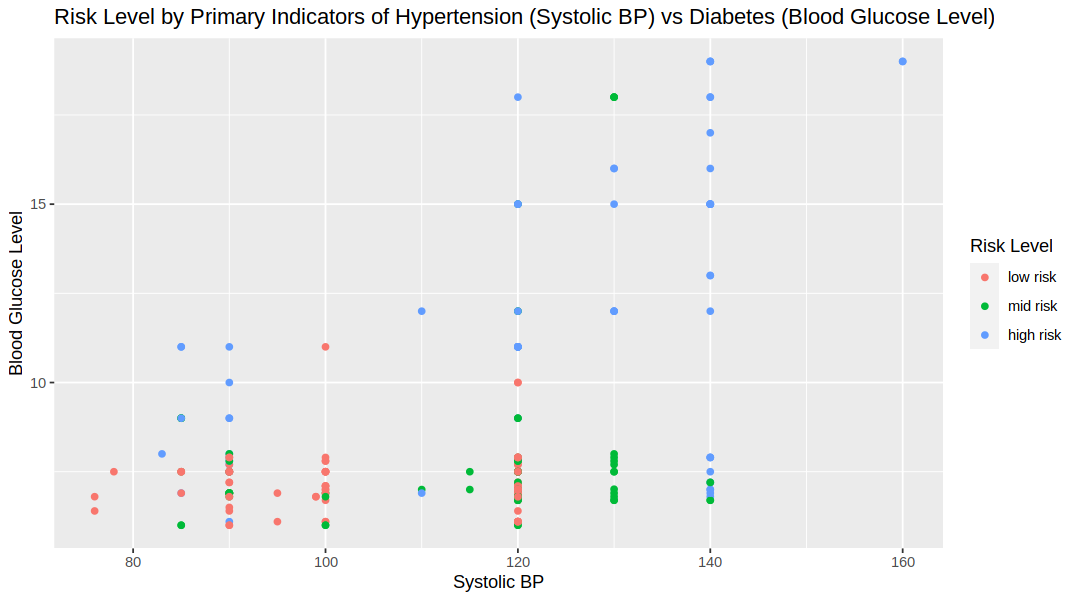

In [23]:
options(repr.plot.width = 9, repr.plot.height = 5)

health_pred_plot <- health_pred_k2 |>
    ggplot(aes(x = SystolicBP, y=BS, color = .pred_class)) +
    geom_point() +
    labs(x="Systolic BP", y= "Blood Glucose Level", color= "Risk Level")+
    ggtitle("Risk Level by Primary Indicators of Hypertension (Systolic BP) vs Diabetes (Blood Glucose Level)")
health_pred_plot

Since systolic blood pressure is a more potent indicator of stroke and heart disease associated with hypertension, and blood glucose level is the primary indicator of diabetic health according to research, we plot these two variables against predicted risk level. 

## Accuracy

In [16]:
health_prediction_accuracy <- health_pred_k2 |>
                            metrics(truth = RiskLevel, estimate = .pred_class)

health_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8188976
kap,multiclass,0.7233771


Thus, our classifier has an accuracy of about 81.89%. To specifically analyze how effectively it helps us identify high risk cases, we can use a confusion matrix. 

## Confusion Matrix

In [17]:
health_conf_mat <- health_pred_k2 |>
    conf_mat(RiskLevel, .pred_class) 
health_conf_mat

           Truth
Prediction  low risk mid risk high risk
  low risk        89       17         5
  mid risk        11       61         5
  high risk        2        6        58

Since we are more interested in identifying **true positives** i.e. high risk cases correctly classified as high risk (bottom right corner), we will calculate the precision and recall of our classifier.

In [18]:
#Calculate Precision
precision <- 58/(2+6+58)
precision

[1] 0.8787879

In [19]:
#Calculate Recall
recall <- 58/(5+5+58)
recall

[1] 0.8529412

Thus, this means that about 87.88% of the cases predicted to be high risk were actually high risk (precision), and about 85.29% of true high risk cases were identified correctly (recall). These metrics speak to the usefulness of our classifier since both precision and recall are relatively high. Usually, there is a trade-off between precision and recall but in our case, the classifier is surprisingly good at both. 

Finally, since we had a concern regarding false negatives given that we had more low risk and mid risk observations, we calculate the percentage of false negatives i.e. the percent of high risk cases that were incorrectly classified as low or mid risk. 

In [20]:
false_negatives <- (5+5)/(5+5+58)
false_negatives

[1] 0.1470588

14.71% is not a very high rate of false negatives which removes any concerns about the class imbalance which we might've had. 

## Discussion



We found that model data from sensing enabled technology such as levels of blood pressure, blood glucose level and heart rate, are able to accurately predict maternal health risk in Bangladeshi women. We found that by building a classifier with k=2 using all predictors except for body temperature, the classifier was accurate 81.89% of the time. In addition, precision and recall rates were identified as 87.88% and 85.29%, with false negatives being low at 14.71%. This demonstrates our classifier's ability in determining high risk cases at a significant rate, and illustrates the great utility this could have to classify and predict Bangladeshi women's maternal health risk levels.

This satisfies overall expectations of an highly accurate classifier as background research identified congruent predictors to maternal health that were used in our classifier. While there was an unexpected result of having both high precision and recall, this speaks to a strong classifier being built as a result of our evaluation and tuning as opposing extremes in precision and recall are easy to manufacture. This demonstrates that our classifier is able to correctly identify high risk situations identified in our test set, and determine whether they are truly high risk. This is highly significant, especially in a real-life setting dealing with maternal mortality rates where both factors need to be at high levels in order to be considered, let alone incorporated. 

Impacts that a classifier like this could have would be the extrapolation to other populations. Looking at other populations with lower socio-economic status, a classifier like this with sensing enabled technology would prove extremely useful especially with low medical resources such as doctors/nurses. Model data can be used to predict individuals that have higher health risk levels, and need more attention in an area where numbers of doctors and healthcare professionals are limited. If implemented in higher socio-economic status populations, this could greatly increase efficiencies in healthcare when dealing with groups of individuals who are higher risk than others. More importantly, mortality rates would be reduced as a result of this. With greater attention highlighted at correct cases of high risk individuals, the chances of receiving the help that these individuals need are far greater, and would therefore have a much lower maternal mortality rate.

However, despite the positives of the implementation of such a strong classifier, we need to consider the logistics of rolling out such a program. A key component to obtaining such data to be used is the "sensing enabled technology" that was used for this data. Deploying such an initiative would be expensive and complex to be engaged on a large scale. In addition, while technology like this can better direct individuals who are of higher risk to the care they need, maternal figures still are required to go to a baseline of appointments to assess the progress and status of their pregnancies. Yes, this can improve efficiencies in hospitals when targeting more significant cases, however, when the capacity of healthcare staff is low, this could be extremely hard on healthcare professionals especially when numbers of doctors and nurses are low, Canada- even though a developed nation- being a prime example. Overall, this does not take away that high risk cases can be better caught and looked at, but this is a consideration to be had. As a result, something to explore further would be the number of previously missed high risk cases that are identified through this classifier to determine it's efficacy in real healthcare scenarios.

## References

Ahmed, M., Kashem, M. A., Rahman, M., & Khatun, S. (2020) Review and analysis of risk factor of maternal health in remote area using the internet of things (IoT). inecce2019 (pp. 357-365). Springer Singapore. https://doi.org/10.1007/978-981-15-2317-5_30

Edwards, M. J. (2006). Review: Hyperthermia and fever during pregnancy. Birth Defects Research. A Clinical and Molecular Teratology, 76(7), 507-516. https://doi.org/10.1002/bdra.20277

Say, L., Dr, Chou, D., MD, Gemmill, A., MPH, Tunçalp, Ö., MD, Moller, A., MSc, Daniels, J., PhD, Gülmezoglu, A. M., MD, Temmerman, M., MD, & Alkema, L., PhD. (2014). Global causes of maternal death: A WHO systematic analysis. The Lancet Global Health, 2(6), e323-e333. https://doi.org/10.1016/S2214-109X(14)70227-X